### importing the required libraries

In [71]:
!pip install pandas

In [72]:
import pandas as pd


pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

### creating a dataframe from imported dataset

In [73]:
filePath = r"../dataset/ESWA20_manualclassification.csv"

In [74]:
df = pd.read_csv(filePath, encoding='ISO-8859-1')

df

,Commit Message,Category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


In [75]:
df['commit_message'] = df['Commit Message']
del df['Commit Message']

df['category'] = df['Category']
del df['Category']

df

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external
...,...,...
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell


### understanding the dataset

In [76]:
df.shape

(1740, 2)

There are 1740 records and 2 features in the dataset (including the target feature)

In [77]:
df.dtypes

commit_message    object
category          object
dtype: object

both the features have object as a data type

In [78]:
df.head()

,commit_message,category
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional
3,- Merge changes from Pull-Request #6 \t - Fix aggregation generation and cleanup dead code - Update dependencies versions,code smell
4,Bug 233643 - API builder performance bad for incremental build,external


In [79]:
df.tail()

,commit_message,category
1735,working on #339: introducing the getSpecialFeatureCollection Method as a more general way to get all the PrintTemplateFeatures. improve the numbering\n,functional
1736,working on #339: next step. i\n\nmove all the calculation and handling into the PrintTemplateFeature to handle\nmultiple templateprinting.\n\nThe creation is still very basic though\n,functional
1737,working on #369: generalized the adjustMapForPrintingTemplates and ensureVisibilityOfPrintingTemplates method to adjustMapForSpecialFeatureClasses and ensureVisibilityOfSpecialFeatures\n,functional
1738,working up test coverage; minor tweaks; removing dead code; fixing very minor bugs; adding tests,code smell
1739, changed render routine for text fields  added tabbing abilities to CustomScreen  various modifications on CustomScreen to match the new TextField requirements  changed size of PacketSky,internal


In [80]:
df.sample(5)

,commit_message,category
1228,Splits a long method into multiple shorter methods.,code smell
238,"Added some features for EventFrame and FontFrame\n\nEventFrame:\n * Buttons now display it, rather than toggling it\n * GmObjectFrame has a button to summon it\n * Right click selects and adds an event\n * Clicking or Right Clicking on a branch expands/collapses the branch\n * Functionality similar to GmObjectFrame.EventTree\n * Disabled double-middle-mouse click for event adding\n * Had to resize it to make room for ""double click"" etc. label\n\nFontFrame:\n * Added a text field for what text to preview\n * Had to resize to make room\n\nDisabled bold text throughout the UI. See LGM line 251.\n * This may cause some components to display incorrectly\n\ngit-svn-id: https://lateralgm.svn.sourceforge.net/svnroot/lateralgm@233 8f422083-7f27-0410-bc82-93e204be8cd2\n",functional
595,"Fixed #17 - made toggling Vrapper instant and global\n * I kind-of abused WeakReferences in the process\n - I thought keeping old editor alive by Vrapper may be the cause of #28\n - they may be; it needs further investigation\n - weak maps are good idea for observers, anyway\n - http://blog.kamil.dworakowski.name/2008/01/anti-pattern-static-subject-to-observer.html\n",bugfix
577,"Fix performance regresssion introduced by using InetSocketAddress\ngetHostName()\nPatch provided by Scott Harrington, improved upon by Kris Jurka\n",bugfix
714,"I hate Java. I hate everything about the Java ecosystem. I have moved this project to Maven with no small amount of difficutly. Honestly most of the pom.xml file is just magic to me. I understand parts but like most things in java I have no idea how its doing most of what its doing. Its a large cryptic XML document with very little human readable meaning. I mean Makefiles were considered arcaic however you can find a dozen or so simple introductions on how to construct a Makefile that doesn't depend on magic to build your project. Not so with Maven. The only official Documentation is a 100+ line document that has no coorliation to what is actually happening to build your file. Take for example the fact that i know have a whole target folder that has lots of stuff in it. At no place in my pom.xml did I say create a target folder nor did I say run javac. The closest I came to either of those was set my ""source"" tag to 1.5 ( I only knew to do this because Bukkit does it ). Furthermore the comand to compile the project into a jar ( again no mention of a jar file in the pom.xml ) is to issue a mvn install command. That clearly makes sense. mvn build anyone mvn package nope mvn install. Its like java heads have a fetish for complexity.",external


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   commit_message  1740 non-null   object
 1   category        1740 non-null   object
dtypes: object(2)
memory usage: 27.3+ KB


### EDA

In [82]:
df.describe(include='object')

,commit_message,category
count,1740,1740
unique,1716,5
top,Removed duplicate code and added outlines for how to add version to the start log entry.,functional
freq,3,348


In [83]:
df.category.unique()

array(['functional', 'bugfix', 'code smell', 'external', 'internal'],
      dtype=object)

In [84]:
!pip install seaborn

In [85]:
import seaborn as sns
sns.set_style(style="whitegrid")

In [86]:
import matplotlib.pyplot as plt

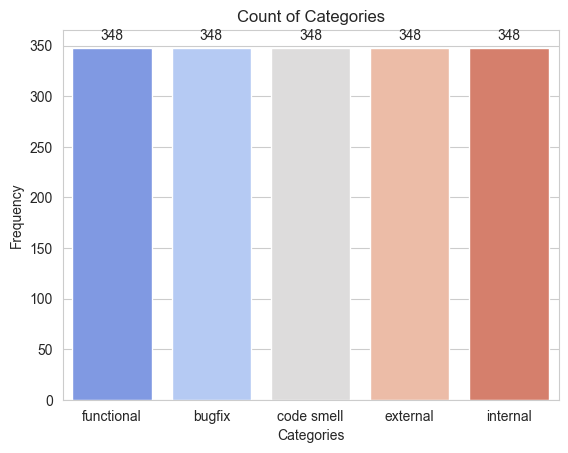

In [87]:
ax = sns.countplot(x=df.category, data=df, palette='coolwarm', hue=df.category, legend=False)

plt.title('Count of Categories')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# annotate each bar with the number of occurences
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # The number to annotate
        (p.get_x() + p.get_width() / 2., p.get_height()), # Position
        ha = 'center', # center horizontally
        va = 'center', # center vertically
        xytext = (0, 9), # Text offset
        textcoords = 'offset points')

plt.show()

In [88]:
print("The sum of duplicate records is ")
df.duplicated().sum()


The sum of duplicate records is 


19

In [89]:
# removing the duplicates

df = df.drop_duplicates()

df.count()

commit_message    1721
category          1721
dtype: int64

In [90]:
# checking for null values

df.isnull().sum()

commit_message    0
category          0
dtype: int64

In [91]:
# checking for NaN values

df.isna().sum()

commit_message    0
category          0
dtype: int64

In [92]:
# checking for records with only spaces in the commit_message columns

only_spaces_count = df['commit_message'].apply(lambda x: x.isspace() if pd.notnull(x) else False).sum()

only_spaces_count


0

In [93]:
df.count(), df.nunique()

(commit_message    1721
 category          1721
 dtype: int64,
 commit_message    1716
 category             5
 dtype: int64)

### found out the data descrepancy

the total records are 1721 and the unique records are 1716 and 5 in columns commit_messages and categories, respectively

I have done the root-cause analysis of this issue, to determine whether to keep the record or remove it completely

In [94]:

duplicate_records = df[df['commit_message'].duplicated(keep=False)]

duplicate_records

# 508, 796, 862, 1242, 1346

,commit_message,category
508,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,internal
509,Enhanced tool palette composition functionality. Added Morph Activity/Gateway features.,external
796,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,internal
797,Issue 176: size can now test compatibility with images; refactored vcloud config logic; updated to support latest bluelock,external
862,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,internal
863,Make bitcoinSerialize() return a copy by default provide an unsafeBitcoinSerialize() method for high performance applications that are willing to deal with the extra API complexity.,external
1241,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,internal
1242,StewartSingularValueDecomposition: re-factor monolithic code and ugly switch statement into multiple methods,code smell
1346,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",internal
1347,"[BACKLOG-4709] - Small changes in platform to improve performance - UserSettingService - replace keySet() + get() combination with entrySet() - remove useless object instantiation - remove useless explicit map.remove() - AbstractSpringPentahoObjectFactory - add logger.isDebugEnabled() - remove useless non-null validation - OrderedApplicationEventMulticaster - replace ArrayList with array for faster sorting - extract stateless Comparator to a final field to avoid useless instantiation - replace new Integer.compareTo() with Integer.compare() - add tests - RoleAuthorizationPolicy - create ArrayLists of exact size - JcrRepositoryFileAclUtils - iterate through List not Set - DefaultPermissionConversionHelper - replace indexOf("":"") with indexOf(':') as it is more effective - AuditConnection - change the order: first try to obtain a connection and only then sleep",external


**508, 509**: maybe new functionality, thus **internal** seems correct as it does not specifically mention fixing bugs or issues.

**796, 797**: seems like internal enhancements and updates to existing systems, so **internal** 

**862, 863**: change in functionality to enhance performance and security, so **internal**

**1241, 1242**: This is clearly a code maintenance task, thats why the **code smell** category

**1346, 1347**: If "external" refers to changes that affect end-users or outside systems, and "internal" refers to changes within the codebase that do not affect external interfaces, then it's likely that both should be categorized as **internal**.

In [95]:
df = df.drop(labels=[509, 797, 863, 1241, 1347], axis=0)

### Text Pre-processing

In [96]:
# Find the top 5 rows with the maximum lengths in 'col1' (sorted by descending length)
top_5_max_lengths = df['commit_message'].str.len().sort_values(ascending=False).head(5)

# Print the top 5 rows with corresponding lengths
for index, length in top_5_max_lengths.items():
  print(f"\nRow Index: {index}")
  print(df.loc[index])
  print(f"Length: {length}")




Row Index: 400
commit_message    Changes based on Keith's review.  A few tweaks to EdgeSet to help tracking edge\nremoval\n\n\tmodified:   src/edu/ucla/sspace/common/Similarity.java\n\n- Updated to use VectorMath.dotProduct for the Tanimoto coefficient\n\n\tdeleted:    src/edu/ucla/sspace/common/WordComparator.java\n\n- Moved to SimpleNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/dependency/SimpleDependencyPath.java\n\n- Removed println\n\n\tmodified:   src/edu/ucla/sspace/graph/AbstractGraph.java\n\n- Added missing implementation to Subgraph class so now all the unit tests pass\n\n\tmodified:   src/edu/ucla/sspace/graph/DirectedMultigraph.java\n\n- Added missing implementation to Subgraph class so now all the unit tests pass\n\n- Fixed bug for reporting the correct edge types after removal\n\n- Removed dead code\n\n\tmodified:   src/edu/ucla/sspace/graph/EdgeSet.java\n\n- Updated so that disconnect() now returns the number of edges that were removed\n\n\tmodified:   src/

In [97]:
!pip install contractions

In [98]:
!pip install nltk

In [99]:
import nltk
# import ssl
# try:
#    _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#    pass
# else:
#    ssl._create_default_https_context = _create_unverified_https_context



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/onkars/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/onkars/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/onkars/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
!pip install unidecode

In [101]:
import re
import contractions
import unidecode

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Normalize accents and special characters
    text = unidecode.unidecode(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove single-character tokens (mostly punctuation)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Trim leading and trailing whitespace
    text = text.strip()
    
    return text



In [102]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))

# custom_stop_words = ['git', 'svn', 'refactor', 'gitsvnid', 'signedoffby', 'reviewedon', 'testedby', 'us', 'id', 'changeid', 'lot', 'small', 'thing', 'way']  # Add more custom words here --- lots
# stop_words.update(custom_stop_words)

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


In [103]:
df['commit_message_clean'] = df['commit_message'].apply(clean_text)
df['commit_message_clean'] = df['commit_message_clean'].apply(remove_stopwords)


In [104]:
display(df.loc[[400, 833, 243, 878, 50]])

commit_message  \
400  Changes based on Keith's review.  A few tweaks to EdgeSet to help tracking edge\nremoval\n\n\tmodified:   src/edu/ucla/sspace/common/Similarity.java\n\n- Updated to use VectorMath.dotProduct for the Tanimoto coefficient\n\n\tdeleted:    src/edu/ucla/sspace/common/WordComparator.java\n\n- Moved to SimpleNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/dependency/SimpleDependencyPath.java\n\n- Removed println\n\n\tmodified:   src/edu/ucla/sspace/graph/AbstractGraph.java\n\n- Added missing implementation to Subgraph class so now all the unit tests pass\n\n\tmodified:   src/edu/ucla/sspace/graph/DirectedMultigraph.java\n\n- Added missing implementation to Subgraph class so now all the unit tests pass\n\n- Fixed bug for reporting the correct edge types after removal\n\n- Removed dead code\n\n\tmodified:   src/edu/ucla/sspace/graph/EdgeSet.java\n\n- Updated so that disconnect() now returns the number of edges that were removed\n\n\tmodified:   src/edu/ucla/sspace/graph/GenericEdgeSet.java\n\tmodified:   src/edu/ucla/sspace/graph/SparseDirectedEdgeSet.java\n\tmodified:   src/edu/ucla/sspace/graph/SparseDirectedTypedEdgeSet.java\n\tmodified:   src/edu/ucla/sspace/graph/SparseTypedEdgeSet.java\n\tmodified:   src/edu/ucla/sspace/graph/SparseUndirectedEdgeSet.java\n\tmodified:   src/edu/ucla/sspace/graph/SparseWeightedEdgeSet.java\n\n- Updated to support EdgeSet interface change\n\n\tdeleted:    src/edu/ucla/sspace/graph/GraphRandomizer.java\n\n- Removed dead class (functionality is in Graphs.java)\n\n\tmodified:   src/edu/ucla/sspace/graph/SimpleWeightedEdge.java\n\n- Fixed hashCode()\n\n\tdeleted:    src/edu/ucla/sspace/graph/SparseSymmetricEdgeSet.java\n\n- Removed dead class\n\n\tmodified:   src/edu/ucla/sspace/graph/UndirectedMultigraph.java\n\n- Added missing implementation to Subgraph class so now all the unit tests pass\n\n- Fixed bug for reporting the correct edge types after removal\n\n- Removed dead code\n\n\tmodified:   src/edu/ucla/sspace/mains/FixedDurationTemporalRandomIndexingMain.java\n\n- Updated to replace WordComparator with SimpleNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/mains/LexSubWordsiMain.java\n\n- Updated to replace WordComparator with SimpleNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/text/LabeledParsedStringDocument.java\n\n- Updated for new ParsedDocument interface\n\n\tmodified:   src/edu/ucla/sspace/text/ParsedDocument.java\n\n- Updated to specify the format of text() as the tokens with white space delimiters.\n\n- Added a new prettyPrintText() which is the attempt to nicely format the tokens\n  as they would have been originally.\n\n\tmodified:   src/edu/ucla/sspace/text/PukWaCDocumentIterator.java\n\n- Fixed javadoc\n\n\tmodified:   src/edu/ucla/sspace/text/UkWaCDocumentIterator.java\n\n- Added more class javadoc\n\n\tmodified:   src/edu/ucla/sspace/tools/NearestNeighborFinderTool.java\n\n- Updated to use the class instances instead of the interface\n\n\tmodified:   src/edu/ucla/sspace/tools/SemanticSpaceExplorer.java\n\n- Updated to replace WordComparator with PartitioningNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/tools/SimilarityListGenerator.java\n\n- Updated to replace WordComparator with PartitioningNearestNeighborFinder\n\n\tmodified:   src/edu/ucla/sspace/util/HashIndexer.java\n\n- Fixed javadoc\n\n\tmodified:   src/edu/ucla/sspace/util/PairCounter.java\n\n- Fixed javadoc\n\n\trenamed:    src/edu/ucla/sspace/util/NearestNeighborFinder.java -> src/edu/ucla/sspace/util/PartitioningNearestNeighborFinder.java\n\n- Moved so that NearestNeighborFinder can be an interface\n\n\tmodified:   src/edu/ucla/sspace/util/ReflectionUtil.java\n\n- Removed dead code\n\n\tmodified:   src/edu/ucla/sspace/util/primitive/IntIntHashMultiMap.java\n\n- Added javadoc\n\n\tmodified:   src/edu/ucla/sspace/util/primitive/IntIntMultiMap.java\n\n- Added javadoc\n\n\tmodified:   test/edu/ucla/sspace/graph/DirectedMultigraphTests.java\n\n- Uncommented

In [105]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['commit_message_clean'].apply(word_tokenize)


In [106]:
from nltk import pos_tag

df['pos_tags'] = df['tokens'].apply(pos_tag)


In [107]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to map NLTK position tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

# Lemmatize a sentence with the appropriate POS tag
def lemmatize_with_pos(sentence):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in sentence]

# Apply the lemmatization function to the pos tags
df['lemmatized'] = df['pos_tags'].apply(lemmatize_with_pos)


In [108]:
df['lemmatized_text'] = df['lemmatized'].apply(' '.join)


In [109]:
df.head()

,commit_message,category,commit_message_clean,tokens,pos_tags,lemmatized,lemmatized_text
0,\tNIO Reads writes are completed in the caller thered;\n\t100% compatible with old interface and functionality.\n\tEach connection has an instance of this object to\n\treceive data for a message in multiple OP_READ events.\n,functional,nio reads writes completed caller would compatible old interface functionality connection instance object receive data message multiple opread events,"[nio, reads, writes, completed, caller, would, compatible, old, interface, functionality, connection, instance, object, receive, data, message, multiple, opread, events]","[(nio, JJ), (reads, NNS), (writes, VBZ), (completed, VBN), (caller, NN), (would, MD), (compatible, VB), (old, JJ), (interface, NN), (functionality, NN), (connection, NN), (instance, NN), (object, VBP), (receive, JJ), (data, NNS), (message, NN), (multiple, JJ), (opread, JJ), (events, NNS)]","[nio, read, write, complete, caller, would, compatible, old, interface, functionality, connection, instance, object, receive, data, message, multiple, opread, event]",nio read write complete caller would compatible old interface functionality connection instance object receive data message multiple opread event
1,* temporary fix for non-shared JArray objects\n * added generic unittests to check jcc/lucene/solr/montysolr functionality\n * wrote unittest for newseman (it does a complete processing from python side)\n - now what remains is to call it from java\n - decide on proper behaviour for cases when tokens are added/grouped\n,bugfix,temporary fix nonshared jarray objects added generic unittests check jcclucenesolrmontysolr functionality wrote unittest newseman complete processing python side remains call java decide proper behaviour cases tokens addedgrouped,"[temporary, fix, nonshared, jarray, objects, added, generic, unittests, check, jcclucenesolrmontysolr, functionality, wrote, unittest, newseman, complete, processing, python, side, remains, call, java, decide, proper, behaviour, cases, tokens, addedgrouped]","[(temporary, JJ), (fix, NN), (nonshared, VBD), (jarray, JJ), (objects, NNS), (added, VBD), (generic, JJ), (unittests, NNS), (check, VBP), (jcclucenesolrmontysolr, JJ), (functionality, NN), (wrote, VBD), (unittest, JJ), (newseman, JJ), (complete, JJ), (processing, NN), (python, JJ), (side, NN), (remains, VBZ), (call, JJ), (java, NN), (decide, NN), (proper, IN), (behaviour, JJ), (cases, NNS), (tokens, NNS), (addedgrouped, VBD)]","[temporary, fix, nonshared, jarray, object, add, generic, unittests, check, jcclucenesolrmontysolr, functionality, write, unittest, newseman, complete, processing, python, side, remain, call, java, decide, proper, behaviour, case, token, addedgrouped]",temporary fix nonshared jarray object add generic unittests check jcclucenesolrmontysolr functionality write unittest newseman complete processing python side remain call java decide proper behaviour case token addedgrouped
2,* Java:\n * Added RCON functionality for Source servers:\n * Added steamcondenser.steam.packets.rcon package\n * Added RCONAuthRequestPacket\n * Added RCONAuthResponsePacket\n * Added RCONExecRequestPacket\n * Added RCONExecResponsePacket\n * Added RCONPacket\n * Added RCONNoAuthException\n * Split SteamSocket into QuerySocket and RCONSocket\n * Stub functionality for GoldSrc servers\n * GoldSrc uses UDP and needs a special implementation\n * Added tests\n,functional,java added rcon functionality source servers added steamcondensersteampacketsrcon package added rconauthrequestpacket added rconauthresponsepacket added rconexecrequestpacket added rconexecresponsepacket added rconpacket added rconnoauthexception split steamsocket querysocket rconsocket stub functionality goldsrc servers goldsrc uses udp needs special implementation added tests,"[java, added, rcon, functionality, source, servers, added, steamcondensersteampacketsrcon, package, added, rconauthrequestpacket, added, rconauthresponsepacke

In [110]:
df = df[['lemmatized_text', 'category']]

df

,lemmatized_text,category
0,nio read write complete caller would compatible old interface functionality connection instance object receive data message multiple opread event,functional
1,temporary fix nonshared jarray object add generic unittests check jcclucenesolrmontysolr functionality write unittest newseman complete processing python side remain call java decide proper behaviour case token addedgrouped,bugfix
2,java add rcon functionality source server add steamcondensersteampacketsrcon package add rconauthrequestpacket add rconauthresponsepacket add rconexecrequestpacket add rconexecresponsepacket add rconpacket added rconnoauthexception split steamsocket querysocket rconsocket stub functionality goldsrc server goldsrc use udp need special implementation add test,functional
3,merge change pullrequest fix aggregation generation cleanup dead code update dependency version,code smell
4,bug api builder performance bad incremental build,external
...,...,...
1735,work introduce getspecialfeaturecollection method general way get printtemplatefeatures improve number,functional
1736,work next step move calculation handle printtemplatefeature handle multiple templateprinting creation still basic though,functional
1737,work generalize adjustmapforprintingtemplates ensurevisibilityofprintingtemplates method adjustmapforspecialfeatureclasses ensurevisibilityofspecialfeatures,functional
1738,work test coverage minor tweak remove dead code fix minor bug add test,code smell


In [111]:
df['lemmatized_text'] = df['lemmatized_text'].apply(clean_text)
df['lemmatized_text'] = df['lemmatized_text'].apply(remove_stopwords)

In [112]:
df = df.drop_duplicates()

In [113]:
df.isnull().count()

lemmatized_text    1702
category           1702
dtype: int64

In [114]:
# For rows
df = df.dropna(how='all')



In [115]:
display(df.loc[[400, 833, 243, 878, 50]])

,lemmatized_text,category
400,change base keiths review tweak edgeset help track edge removal modify srceduuclasspacecommonsimilarityjava update use vectormathdotproduct tanimoto coefficient delete srceduuclasspacecommonwordcomparatorjava move simplenearestneighborfinder modify srceduuclasspacedependencysimpledependencypathjava remove println modify srceduuclasspacegraphabstractgraphjava add miss implementation subgraph class unit test pass modify srceduuclasspacegraphdirectedmultigraphjava add miss implementation subgraph class unit test pass fix bug report correct edge type removal remove dead code modify srceduuclasspacegraphedgesetjava update disconnect return number edge remove modified srceduuclasspacegraphgenericedgesetjava modify srceduuclasspacegraphsparsedirectededgesetjava modify srceduuclasspacegraphsparsedirectedtypededgesetjava modify srceduuclasspacegraphsparsetypededgesetjava modify srceduuclasspacegraphsparseundirectededgesetjava modify srceduuclasspacegraphsparseweightededgesetjava updated support edgeset interface change delete srceduuclasspacegraphgraphrandomizerjava remove dead class functionality graphsjava modify srceduuclasspacegraphsimpleweightededgejava fixed hashcode delete srceduuclasspacegraphsparsesymmetricedgesetjava remove dead class modify srceduuclasspacegraphundirectedmultigraphjava add miss implementation subgraph class unit test pass fix bug report correct edge type removal remove dead code modify srceduuclasspacemainsfixeddurationtemporalrandomindexingmainjava updated replace wordcomparator simplenearestneighborfinder modify srceduuclasspacemainslexsubwordsimainjava updated replace wordcomparator simplenearestneighborfinder modify srceduuclasspacetextlabeledparsedstringdocumentjava updated new parseddocument interface modify srceduuclasspacetextparseddocumentjava update specify format text tokens white space delimiters add new prettyprinttext attempt nicely format token would originally modify srceduuclasspacetextpukwacdocumentiteratorjava fix javadoc modify srceduuclasspacetextukwacdocumentiteratorjava add class javadoc modify srceduuclasspacetoolsnearestneighborfindertooljava update use class instance instead interface modified srceduuclasspacetoolssemanticspaceexplorerjava update replace wordcomparator partitioningnearestneighborfinder modify srceduuclasspacetoolssimilaritylistgeneratorjava updated replace wordcomparator partitioningnearestneighborfinder modify srceduuclasspaceutilhashindexerjava fix javadoc modify srceduuclasspaceutilpaircounterjava fix javadoc rename srceduuclasspaceutilnearestneighborfinderjava srceduuclasspaceutilpartitioningnearestneighborfinderjava move nearestneighborfinder interface modify srceduuclasspaceutilreflectionutiljava remove dead code modify srceduuclasspaceutilprimitiveintinthashmultimapjava add javadoc modify srceduuclasspaceutilprimitiveintintmultimapjava add javadoc modify testeduuclasspacegraphdirectedmultigraphtestsjava uncommented unit test modify testeduuclasspacedependencybreadthfirstpathiteratortestjava modify testeduuclasspacedependencyconlldependencyextractortestjava modify testeduuclasspacedependencywackydependencyextractortestjava modify testeduuclasspacetextcorporapukwacdependencycorpusreadertestjava modify testeduuclasspacewordsidependencycontextextractortestjava modify testeduuclasspacewordsioccurrencedependencycontextgeneratortestjava modify testeduuclasspacewordsiorderingdependencycontextgeneratortestjava modify testeduuclasspacewordsipartofspeechdependencycontextgeneratortestjava modify testeduuclasspacewordsipsdpseudoworddependencycontextextractortestjava modify testeduuclasspacewordsisemevalsemevaldependencycontextextractortestjava fix unit test support proper tabdelimiting conll format,bugfix
833,lot lot bug fix minor functionality enhancement modify srcmainjavaeduuclasspacecommonsimilarityjava add warning invalid kldivergence computation add kruskalgoodman gamma discover spearmans rho kendall tau wrong fix modify srcmainjavaeduu

In [116]:
df.count()

lemmatized_text    1702
category           1702
dtype: int64

In [117]:
df['lemmatized_text'].duplicated().sum()


1

In [118]:
duplicate_records = df[df['lemmatized_text'].duplicated(keep=False)]

duplicate_records 

,lemmatized_text,category
577,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,bugfix
578,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,external


In [119]:
display(df.iloc[[567, 568, 569, 570]])

,lemmatized_text,category
576,fix pb image interpretation header footer work docx see,bugfix
577,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,bugfix
578,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,external
579,fix really lot bug rewrite performance,external



**577, 578**: use of the word "Fix" suggests that it is **bugfix** entry, as it address a performance issue.

In [120]:
df = df.drop(labels=[578], axis=0)

In [121]:
display(df.iloc[[566, 567, 568, 569, 570]])

,lemmatized_text,category
575,fix issue join team player longer silently kick team try join nonexistant team join fix inconsistency format team join notification message,bugfix
576,fix pb image interpretation header footer work docx see,bugfix
577,fix performance regresssion introduce use inetsocketaddress gethostname patch provide scott harrington improve upon kris jurka,bugfix
579,fix really lot bug rewrite performance,external
580,fix reload functionality reload break miss cache invalidation reload flush function repository cache library also global function cache local code library reload though want,bugfix


In [122]:
# function that checks if a cell is only space characters
def is_only_spaces(x):
    return isinstance(x, str) and x.strip() == ''

# Apply the function to each element of the DataFrame
spaces_mask = df.applymap(is_only_spaces)

# all() to check if all values in each column are True (only spaces)
columns_only_spaces = spaces_mask.all()

print(columns_only_spaces)

columns_with_only_spaces = columns_only_spaces[columns_only_spaces].index.tolist()
print(columns_with_only_spaces)


lemmatized_text    False
category           False
dtype: bool
[]


/var/folders/t8/nrzsz40n223cvd6fg23stq9m0000gn/T/ipykernel_21722/1045824558.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spaces_mask = df.applymap(is_only_spaces)


In [123]:
df.count()

lemmatized_text    1701
category           1701
dtype: int64

### Training/Testing Split

In [124]:
!pip install scikit-learn

In [125]:
from sklearn.model_selection import train_test_split

X = df['lemmatized_text']  
y = df['category']    


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # 25% of the data will be allocated to the test set
    stratify=y,           # Stratify based on the labels to maintain distribution
    random_state=1234       
)


In [126]:
x_train

755                                                                                                                                      improve performance messagesource condition
672                                                                                                                       full support xelemental injection htmltemplate inheritance
660     fix brokennullcheck also catch problem equality expression offend code rule also match array literal expression slightly great accuracy comment cleanups gitsvnid bafdacfced
1393                                                                                           sshd reame listfiles listsshfiles allow implementation use ftpserver file abstraction
625                                                                     fix dimension properly reduce imagepluscontianers always break eg gaussian convolution handle dimension size
                                                                                            ...

In [127]:
category_counts = y_test.value_counts()

print(category_counts)


category
functional    87
bugfix        87
internal      86
external      85
code smell    81
Name: count, dtype: int64


In [128]:
category_counts = y_train.value_counts()
print(category_counts)

category
bugfix        261
functional    259
internal      256
external      255
code smell    244
Name: count, dtype: int64


In [129]:
y_train.count()

1275

In [130]:
x_train_path = r"../dataset/x_train.csv"

x_train.to_csv(x_train_path, index=False)

In [131]:
y_train_path = r"../dataset/y_train.csv"

y_train.to_csv(y_train_path, index=False)

In [132]:
x_test_path = r"../dataset/x_test.csv"

x_test.to_csv(x_test_path, index=False)

In [133]:
y_test_path = r"../dataset/y_test.csv"

y_test.to_csv(y_test_path, index=False)

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)

# Fit and transform the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Only transform the testing data
x_test_tfidf = vectorizer.transform(x_test)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store the accuracy of each classifier
accuracy_results = {}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[classifier_name] = accuracy
    print(f"{classifier_name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.8661971830985915
Logistic Regression Accuracy: 0.8849765258215962
Multinomial Naive Bayes Accuracy: 0.8028169014084507
K-Nearest Neighbors Accuracy: 0.6784037558685446
Support Vector Classification Accuracy: 0.8732394366197183
Decision Tree Accuracy: 0.8215962441314554


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers with specified hyperparameters
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=70, n_estimators=58, criterion='gini', bootstrap=False),
    "Support Vector Classification": SVC(gamma=1.9, kernel='linear', C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=75, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=0.63),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=69, weights='uniform')
}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.8802816901408451
Support Vector Classification Accuracy: 0.8732394366197183
Decision Tree Accuracy: 0.8169014084507042


In [ ]:
from sklearn.metrics import classification_report

classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=78, n_estimators=500, criterion='gini', bootstrap=False),
    "Support Vector Classification": SVC(gamma='scale', kernel='linear', C=1.99),
    "Decision Tree": DecisionTreeClassifier(max_depth=75, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l1', C=1.0, solver='liblinear'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=2.63),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=69, weights='uniform')
}

evaluation_reports = {}

# Train, predict, and evaluate each classifier separately
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print accuracy and store the report for further analysis
    print(f"{classifier_name} Accuracy: {report['accuracy']}")
    evaluation_reports[classifier_name] = report
    
    # Detailed report
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    


Training Random Forest...
Random Forest Accuracy: 0.8967136150234741
Random Forest Classification Report:
              precision    recall  f1-score   support

      bugfix       0.91      0.83      0.87        87
  code smell       0.99      0.98      0.98        81
    external       0.81      0.89      0.85        85
  functional       0.88      0.83      0.85        87
    internal       0.91      0.97      0.94        86

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426

Training Support Vector Classification...
Support Vector Classification Accuracy: 0.863849765258216
Support Vector Classification Classification Report:
              precision    recall  f1-score   support

      bugfix       0.77      0.87      0.82        87
  code smell       0.95      0.95      0.95        81
    external       0.89      0.84      0.86        85
  functional       0.80      0.78  

In [ ]:
# def fit(self, X, y):
        
#         X_preprocessed = preprocess(X.copy())
        
#         # Separating text data for TF-IDF transformation
#         text_data = X_preprocessed.pop('combined_text')
        
#         text_features = self.tfidf_vectorizer.fit_transform(text_data)
        
#         # Combining text features with other features
#         X_combined = np.hstack((text_features.toarray(), X_preprocessed.values))
        
#         self.classifier.fit(X_combined, y)
        
#         # Define a broad range of parameters for RandomizedSearchCV
#         rf_random_params = {
#             'n_estimators': np.arange(100, 1001, 100),
#             'max_depth': np.arange(10, 101, 10),
#             'min_samples_split': np.arange(2, 11, 1),
#             'criterion': ['gini', 'entropy']
#         }
        
#         # Randomized Search with Cross-Validation
#         self.rfc = RandomForestClassifier(class_weight="balanced", random_state=42)
#         random_search = RandomizedSearchCV(self.rfc, rf_random_params, n_iter=100, cv=5, scoring='f1', n_jobs=-1, random_state=42)
#         random_search.fit(X_combined, y)
#         print("Best parameters from RandomizedSearch: ", random_search.best_params_)

#         # Refine search with GridSearchCV around the best parameters found
#         best_params = random_search.best_params_
#         rf_grid_params = {
#             'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
#             'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],
#             'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
#             'criterion': [best_params['criterion']]
#         }
#         self.rscv = GridSearchCV(self.rfc, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
#         self.rscv.fit(X_combined, y)
#         print("Refined best parameters from GridSearchCV: ", self.rscv.best_params_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are already defined as your training dataset and labels

# # Initialize RandomForestClassifier
# rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=43)

# # Define the parameter space for RandomizedSearchCV
# random_grid = {
#     'n_estimators': np.arange(101, 1001, 100),  # Number of trees in the forest
#     'max_depth': np.arange(11, 101, 10),  # Maximum depth of the tree
#     'bootstrap': [True, False],  # Method of selecting samples for training each tree
#     'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
# }

# # Random search of parameters, using 4 fold cross validation,
# # search across 101 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, n_iter=101, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# rf_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV:")
# print(rf_random.best_params_)

# # You can now take the best parameters from the random search and use them to
# # create a more focused search with GridSearchCV (if necessary). This might involve
# # narrower ranges of parameters or specific combinations that you want to test exhaustively.

# # Refine search with GridSearchCV around the best parameters found
# best_params = rf_random.best_params_
# rf_grid_params = {
#             'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
#             'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],            
#             'criterion': [best_params['criterion']],
#             'bootstrap': [best_params['bootstrap']]
# }
# rscv = GridSearchCV(rf_classifier, rf_grid_params, cv=5, scoring='f1', n_jobs=-1)
# rscv.fit(x_train_tfidf, y_train)
# print("Refined best parameters from GridSearchCV: ", rscv.best_params_)


# # {'n_estimators': 1000, 'min_samples_split': 8, 'max_depth': 90, 'criterion': 'gini', 'bootstrap': False}
# # Refined best parameters from GridSearchCV:  {'criterion': 'gini', 'max_depth': 80, 'min_samples_split': 7, 'n_estimators': 950}

# # {'n_estimators': 200, 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
# # Refined best parameters from GridSearchCV:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150}

# # {'bootstrap': False, 'criterion': 'gini', 'max_depth': 80, 'n_estimators': 950}
# # {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 41, 'n_estimators': 551}
# # {'bootstrap': False, 'criterion': 'gini', 'max_depth': 41, 'n_estimators': 151}

Fitting 3 folds for each of 101 candidates, totalling 303 fits
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=21, n_estimators=101; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=41, n_estimators=101; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=61, n_estimators=101; total time=   0.5s
[CV] END bootstrap=False, criterion=gini, max_depth=31, n_estimators=101; total time=   0.5s
[C

KeyboardInterrupt: 

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.svm import SVC
# import numpy as np

# # Assuming x_train_tfidf and y_train are already defined

# # Initialize the SVC model
# svc = SVC(random_state=42)

# # Define a parameter space for RandomizedSearchCV
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Regularization parameter
#     'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# svm_random = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# svm_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for SVM:")
# print(svm_random.best_params_)


# # Extract the best parameters found by RandomizedSearchCV
# best_params = svm_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
#     'gamma': [best_params['gamma']],
#     'kernel': [best_params['kernel']]
# }

# # Create a GridSearchCV for a more focused search
# svm_grid = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# svm_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for SVM:")
# print(svm_grid.best_params_)




# # Fitting 3 folds for each of 100 candidates, totalling 300 fits
# # Best parameters found by RandomizedSearchCV for SVM:
# # {'kernel': 'rbf', 'gamma': 0.001, 'C': 545.5594781168514}
# # Fitting 5 folds for each of 9 candidates, totalling 45 fits
# # Refined best parameters from GridSearchCV for SVM:
# # {'C': 272.7797390584257, 'gamma': 0.002, 'kernel': 'rbf'}
# # {'C': 5000.0, 'gamma': 'auto', 'kernel': 'rbf'}
# # {'C': 14.881757208156566, 'gamma': 'auto', 'kernel': 'linear'
# # {'C': 0.8118883695943605, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize DecisionTreeClassifier
# dt_classifier = DecisionTreeClassifier(random_state=42)

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'max_depth': np.arange(10, 101, 10),  # Maximum depth of the tree
#     'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# dt_random = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# dt_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Decision Tree:")
# print(dt_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = dt_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10] if best_params['max_depth'] is not None else np.arange(5, 16, 5),
#     'criterion': [best_params['criterion']]
# }

# # Create a GridSearchCV for a more focused search
# dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# dt_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Decision Tree:")
# print(dt_grid.best_params_)

# # {'criterion': 'gini', 'max_depth': 30}
# # # {'criterion': 'gini', 'max_depth': 20
# # {'criterion': 'gini', 'max_depth': 20}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # # Initialize LogisticRegression
# # logistic_regression = LogisticRegression(random_state=42, max_iter=10000)

# # # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# lr_random = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# lr_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Logistic Regression:")
# print(lr_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = lr_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'C': [best_params['C'] * 0.5, best_params['C'], best_params['C'] * 2],
#     'penalty': [best_params['penalty']] if best_params['penalty'] != 'elasticnet' else ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'] if best_params['penalty'] == 'l1' else ['newton-cg', 'lbfgs', 'sag', 'saga']
# }

# # Some combinations might not be compatible, adjust the grid as needed
# # Create a GridSearchCV for a more focused search
# lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=10000), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# lr_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Logistic Regression:")
# print(lr_grid.best_params_)

# # {'C': 2.140666199359698, 'penalty': 'l2', 'solver': 'newton-cg'}
# # {'C': 3.247553478377442, 'penalty': 'l1', 'solver': 'liblinear'
# # {'C': 3.247553478377442, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize MultinomialNB
# mnb = MultinomialNB()

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'alpha': np.linspace(0, 1, 10)  # Additive (Laplace/Lidstone) smoothing parameter
# }

# # Since it's just one parameter, we're technically not "randomizing" much here
# mnb_random = RandomizedSearchCV(estimator=mnb, param_distributions=param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# mnb_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for Multinomial Naive Bayes:")
# print(mnb_random.best_params_)

# # Extract the best alpha found by RandomizedSearchCV
# best_alpha = mnb_random.best_params_['alpha']

# # Create a parameter grid focused around the best alpha found
# param_grid = {
#     'alpha': [max(0, best_alpha - 0.1), best_alpha, best_alpha + 0.1]
# }

# # Create a GridSearchCV for a more focused search
# mnb_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# mnb_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for Multinomial Naive Bayes:")
# print(mnb_grid.best_params_)

# # {'alpha': 1.1}
# # # {'alpha': 0.9
# #{'alpha': 1.1} 

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np

# # Assuming x_train_tfidf and y_train are defined

# # Initialize KNeighborsClassifier
# knn = KNeighborsClassifier()

# # Define the parameter space for RandomizedSearchCV
# param_distributions = {
#     'n_neighbors': np.arange(1, 50),  # Number of neighbors to use
#     'weights': ['uniform', 'distance'],  # Weight function used in prediction
# }

# # Random search of parameters, using 3 fold cross validation,
# # search across a wide range of combinations, and use all available cores
# knn_random = RandomizedSearchCV(estimator=knn, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# knn_random.fit(x_train_tfidf, y_train)

# # Output the best parameters from RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV for KNN:")
# print(knn_random.best_params_)

# # Extract the best parameters found by RandomizedSearchCV
# best_params = knn_random.best_params_

# # Create a parameter grid focused around the best parameters found
# param_grid = {
#     'n_neighbors': [best_params['n_neighbors'] - 2, best_params['n_neighbors'] - 1, best_params['n_neighbors'], best_params['n_neighbors'] + 1, best_params['n_neighbors'] + 2],
#     'weights': [best_params['weights']],
# }

# # Ensure values are within valid ranges
# param_grid['n_neighbors'] = [n for n in param_grid['n_neighbors'] if n > 0]

# # Create a GridSearchCV for a more focused search
# knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# knn_grid.fit(x_train_tfidf, y_train)

# # Output the best parameters from GridSearchCV
# print("Refined best parameters from GridSearchCV for KNN:")
# print(knn_grid.best_params_)

# # {'n_neighbors': 43, 'weights': 'distance'}
# # {'n_neighbors': 46, 'weights': 'distance'
# # {'n_neighbors': 42, 'weights': 'distance'}

In [ ]:
from sklearn.metrics import classification_report

# "Random Forest": RandomForestClassifier(max_depth=80, n_estimators=950, criterion='gini', bootstrap=False)
#     "Support Vector Classification": SVC(gamma='auto', kernel='rbf', C=5000.0),
#     "Decision Tree": DecisionTreeClassifier(max_depth=30, criterion='gini'),
#     "Logistic Regression": LogisticRegression(penalty='l2', C=2.14, solver='newton-cg'),
#     "Multinomial Naive Bayes": MultinomialNB(alpha=1.1),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=43, weights='distance')
    
classifiers = {
    "Random Forest": RandomForestClassifier(max_depth=41, n_estimators=151, criterion='gini', bootstrap=False),
    "Support Vector Classification": SVC(gamma='auto', kernel='linear', C=0.8119),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, criterion='gini'),
    "Logistic Regression": LogisticRegression(penalty='l1', C=3.246, solver='saga'),
    "Multinomial Naive Bayes": MultinomialNB(alpha=1.1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=42, weights='distance')
}

evaluation_reports = {}

# Train, predict, and evaluate each classifier separately
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Train the classifier
    classifier.fit(x_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_tfidf)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print accuracy and store the report for further analysis
    print(f"{classifier_name} Accuracy: {report['accuracy']}")
    evaluation_reports[classifier_name] = report
    
    # Detailed report
    print(f"{classifier_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    


In [ ]:
from sklearn.metrics import confusion_matrix

class_names = ['internal', 'bugfix', 'external', 'functional', 'code smell']


cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Names')
plt.show()


In [ ]:
# y_test.unique()

In [ ]:
# !pip install deap

In [ ]:
# from deap import base, creator, tools, algorithms
# import numpy as np
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# import random


In [ ]:
# def evalModel(individual):
#     # Unpack individual parameters
#     n_estimators, max_depth, criterion, bootstrap = individual
    
#     # Convert binary to boolean for bootstrap
#     bootstrap = True if bootstrap == 1 else False
    
#     # Convert criterion to proper format
#     criterion = "gini" if criterion == 1 else "entropy"
    
#     # Initialize the model with the individual's parameters
#     model = RandomForestClassifier(n_estimators=n_estimators, 
#                                    max_depth=max_depth, 
#                                    criterion=criterion, 
#                                    bootstrap=bootstrap, 
#                                    random_state=42)

#     # Perform 3-fold cross-validation
#     scores = cross_val_score(model, x_train_tfidf, y_train, cv=3)
    
#     # Return the average accuracy
#     return (np.mean(scores),)


In [ ]:
# # Define fitness and individual
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# toolbox = base.Toolbox()

# # Attribute generators for our individual components
# toolbox.register("attr_n_estimators", random.randint, 100, 1000)
# toolbox.register("attr_max_depth", random.randint, 10, 100)
# toolbox.register("attr_criterion", random.randint, 1, 2)  # 1 for gini, 2 for entropy
# toolbox.register("attr_bootstrap", random.randint, 0, 1)  # 0 for False, 1 for True

# # Structure initializers for individuals and the population
# toolbox.register("individual", tools.initCycle, creator.Individual,
#                  (toolbox.attr_n_estimators, toolbox.attr_max_depth, toolbox.attr_criterion, toolbox.attr_bootstrap), n=1)

# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# # Genetic operators
# toolbox.register("evaluate", evalModel)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutUniformInt, low=[100, 10, 1, 0], up=[1000, 100, 2, 1], indpb=0.2)
# toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
# def main():
#     random.seed(42)
#     pop = toolbox.population(n=50)
#     hof = tools.HallOfFame(1)
    
#     stats = tools.Statistics(lambda ind: ind.fitness.values)
#     stats.register("avg", np.mean)
#     stats.register("std", np.std)
#     stats.register("min", np.min)
#     stats.register("max", np.max)
    
#     algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
#                         stats=stats, halloffame=hof, verbose=True)
    
#     return pop, stats, hof

# if __name__ == "__main__":
#     population, stats, hof = main()
#     print("Best individual is:", hof[0], "with fitness:", hof[0].fitness)
